# **Objectives:**
- Load the trained classification model (`model_3_refined.keras`)
- Load preprocessed test images (`X_test.npy`)
- Use the model to predict image class probabilities
- Map predicted classes to human-readable captions (e.g., “Minor Damage”, “Severe Damage”)
- Display images alongside their predicted captions
- Demonstrate how the model output can be interpreted as a “caption”


# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Deep Learning/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Deep-Learning-Classification-Captions.git

import sys
sys.path.append('/content/Deep-Learning-Classification-Captions.git/utils')
%cd /content/Deep-Learning-Classification-Captions/utils
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Deep-Learning-Classification-Captions'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 49 (delta 19), reused 35 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 211.93 KiB | 2.25 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/Deep-Learning-Classification-Captions/utils
/content/Deep-Learning-Classification-Captions/utils
utils.py


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import load_model, preprocess_images, display_predictions

In [3]:
MODEL_PATH = '/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Models/model_3.keras'

In [4]:
X_test_path = '/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Data/X_test.npy'

In [5]:
X_test = np.load(X_test_path)
X_test = preprocess_images(X_test)

In [6]:
model = load_model(MODEL_PATH)

# Predictions

In [7]:
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 903ms/step


In [8]:
class_labels = {
    0: "Minor Damage",
    1: "Severe Damage"
}

captions = [class_labels[p] for p in pred_classes]

Image 0 - Original shape: (224, 224, 3), min: 0.0, max: 0.003921568859368563
Image 0 - Processed shape: (224, 224, 3), min: 0, max: 255


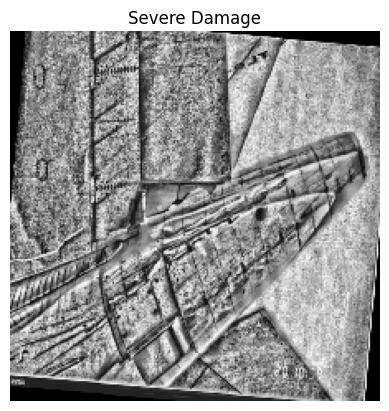

Image 1 - Original shape: (224, 224, 3), min: 0.00015378701209556311, max: 0.003921568859368563
Image 1 - Processed shape: (224, 224, 3), min: 10, max: 255


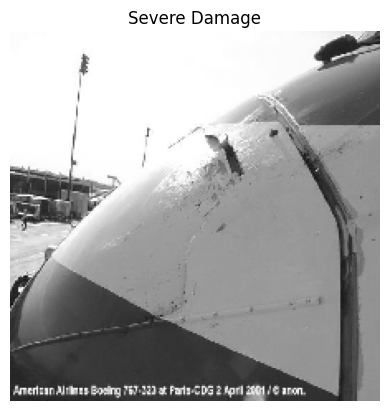

Image 2 - Original shape: (224, 224, 3), min: 0.0, max: 0.003921568859368563
Image 2 - Processed shape: (224, 224, 3), min: 0, max: 255


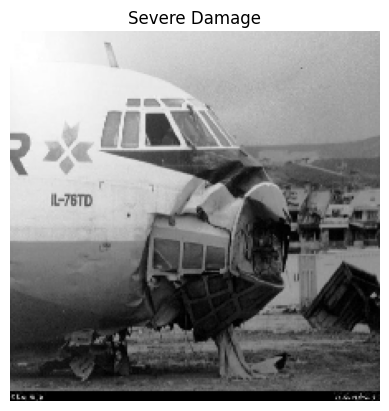

Image 3 - Original shape: (224, 224, 3), min: 0.0, max: 0.0032602844294160604
Image 3 - Processed shape: (224, 224, 3), min: 0, max: 212


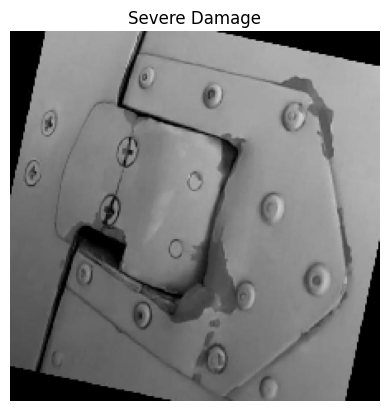

Image 4 - Original shape: (224, 224, 3), min: 0.0, max: 0.003921568859368563
Image 4 - Processed shape: (224, 224, 3), min: 0, max: 255


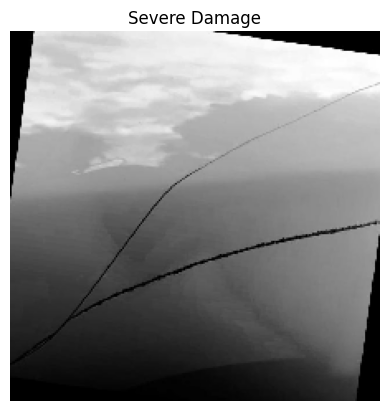

Image 5 - Original shape: (224, 224, 3), min: 0.0, max: 0.003921568859368563
Image 5 - Processed shape: (224, 224, 3), min: 0, max: 255


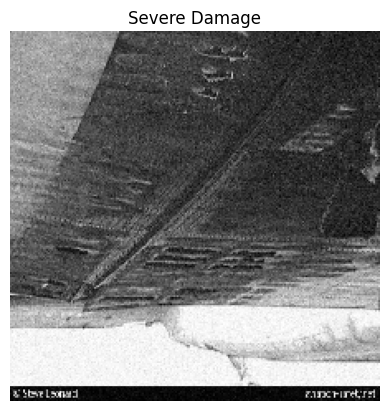

Image 6 - Original shape: (224, 224, 3), min: 0.0, max: 0.003921568859368563
Image 6 - Processed shape: (224, 224, 3), min: 0, max: 255


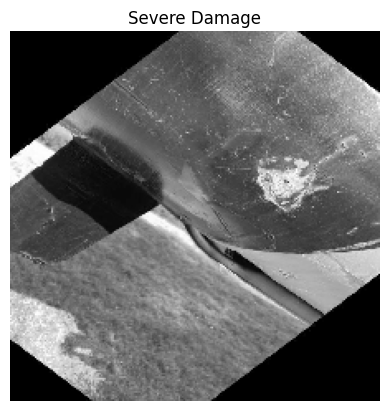

Image 7 - Original shape: (224, 224, 3), min: 0.0, max: 0.003921568859368563
Image 7 - Processed shape: (224, 224, 3), min: 0, max: 255


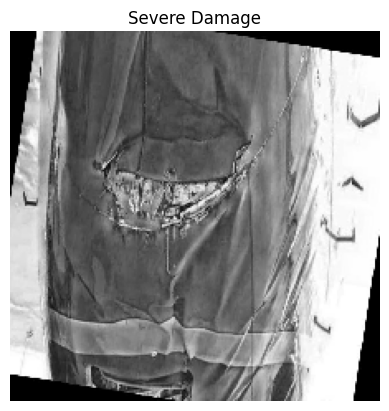

Image 8 - Original shape: (224, 224, 3), min: 0.0, max: 0.003921568859368563
Image 8 - Processed shape: (224, 224, 3), min: 0, max: 255


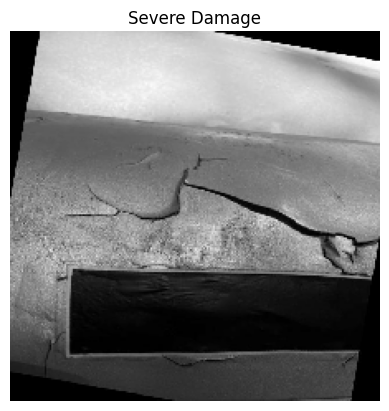

Image 9 - Original shape: (224, 224, 3), min: 0.0, max: 0.003860053839161992
Image 9 - Processed shape: (224, 224, 3), min: 0, max: 251


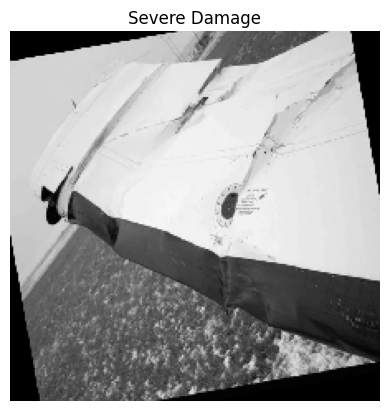

In [9]:
sample_images = X_test[:10]
sample_captions = captions[:10]
display_predictions(sample_images, sample_captions)

# Addressing Class 1 Potential Bias

In [14]:
y_test_path = '/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Data/y_test.npy'
y_test = np.load(y_test_path)

In [15]:
import numpy as np

unique_preds, pred_counts = np.unique(pred_classes, return_counts=True)
print("Predicted classes:", dict(zip(unique_preds, pred_counts)))
y_true_labels = np.argmax(y_test, axis=1)
unique_true, true_counts = np.unique(y_true_labels, return_counts=True)
print("True class distribution:", dict(zip(unique_true, true_counts)))
for i in range(5):
    print(f"Image {i}: Class 0 = {pred_probs[i][0]:.4f}, Class 1 = {pred_probs[i][1]:.4f}")

Predicted classes: {np.int64(1): np.int64(70)}
True class distribution: {np.int64(0): np.int64(34), np.int64(1): np.int64(36)}
Image 0: Class 0 = 0.2844, Class 1 = 0.7156
Image 1: Class 0 = 0.2834, Class 1 = 0.7166
Image 2: Class 0 = 0.2812, Class 1 = 0.7188
Image 3: Class 0 = 0.2854, Class 1 = 0.7146
Image 4: Class 0 = 0.2842, Class 1 = 0.7158
